In [6]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops



### **Visualizacion de Datos**

### **M0**

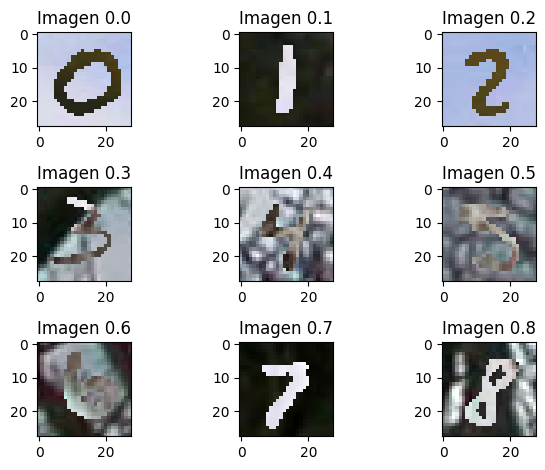

In [7]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m0/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M1**

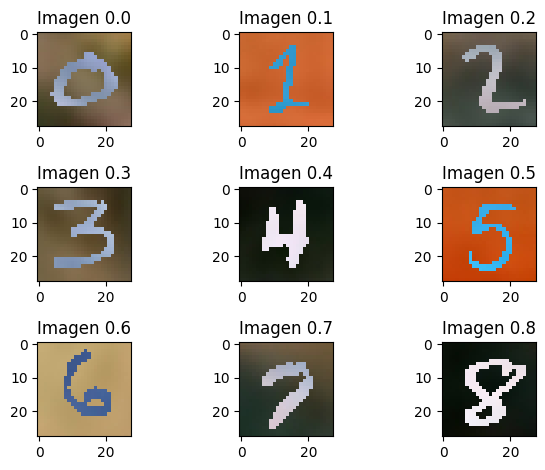

In [8]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m1/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M2**

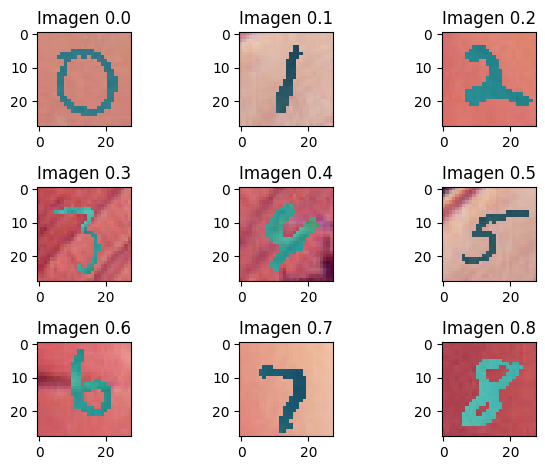

In [9]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m2/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **m3**

### **Cargar Imagenes por lote**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2]
)


test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    './MMNIST/train',         
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    './MMNIST/test',
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical'
)


Found 180000 images belonging to 3 classes.
Found 30000 images belonging to 3 classes.


In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:

history = model.fit(
    train_generator,
    epochs=10,                   
    validation_data=test_generator
)


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 974s 692ms/step - accuracy: 0.9536 - loss: 0.1115 - val_accuracy: 0.9949 - val_loss: 0.0131
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 143s 102ms/step - accuracy: 0.9967 - loss: 0.0092 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.9981 - loss: 0.0057 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 139s 98ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9991 - val_loss: 0.0028
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 138s 98ms/step - accuracy: 0.9985 - loss: 0.0043 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 140s 100ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9997 - val_loss: 8.1715e-04
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - acc

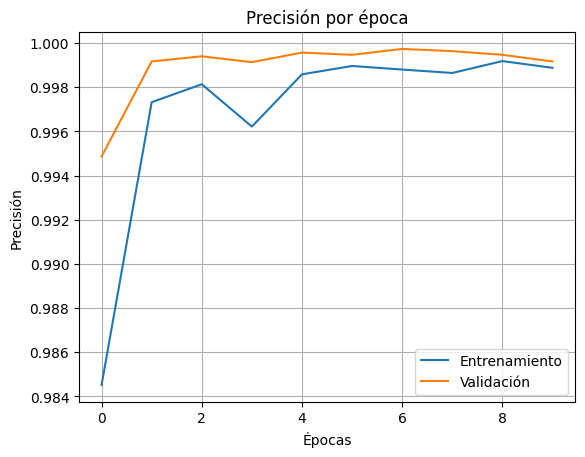

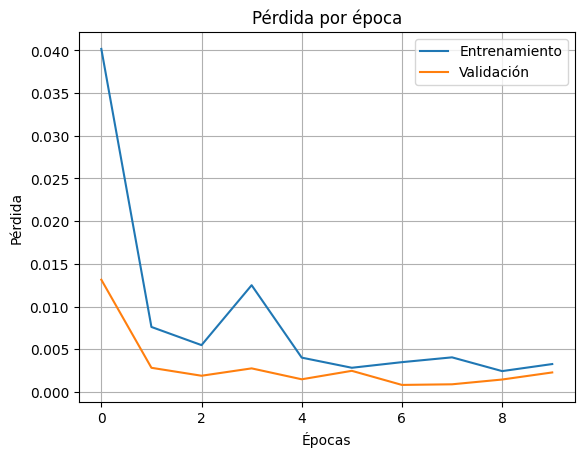

In [13]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()
